### Importación de librerías

In [34]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Incorporación de datos

In [35]:
path = 'C:/Users/Bcaro/OneDrive/Documentos/VSC/Skillnest/Boot/Exámenes/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)


### EDA

In [36]:
df.info()
df.head()
df.tail()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Primeras impresiones**

- El dato 'TotalCharges' corresponde al total pagado hasta el momento del dataset de la mensualidad, por lo que deberia ser de tipo numerico y actualmente es de tipo string.

- El dato 'SeniorCitizen' corresponde a un valor tipo categórico, por lo que no debe ser tipo int, sino string o bool. en este caso se reemplazarán por valores string.

### Limpieza de datos

In [37]:
# Eliminación de datos duplicados
df[df.duplicated() == True] # No se encontraron valores duplicados

# Caso columna 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].replace(['', ' '], np.nan).astype(float) # reemplazo de valores '' o ' ' a NaN, ademas cambio a float
df = df.dropna(subset=['TotalCharges']) # se eliminan los valores nulos debido a que no es posible calcularlos por otro medio o reemplazarlo.

df[df['TotalCharges'].isna() == True]

# Caso SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Yes') # Remplazo de valores 1 por 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No') # Remplazo de valores 0 por 'No'
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [38]:
# Análisis de valores categóricos

df['gender'].value_counts() # todo bien

df['SeniorCitizen'].value_counts() # todo bien

df['Partner'].value_counts() # todo bien

df['Dependents'].value_counts()

df['tenure'].sort_values(ascending= True) # todo bien es la antiguedad de los clienes, por lo que los nuevos son 0, no  hay datos vacios
df['tenure'].value_counts()

df['MultipleLines'].value_counts() # todo bien

df['InternetService'].value_counts()# todo bien

df['OnlineSecurity'].value_counts()# todo bien

df['OnlineBackup'].value_counts()# todo bien

df['DeviceProtection'].value_counts()# todo bien

df['TechSupport'].value_counts()# todo bien

df['StreamingTV'].value_counts()# todo bien

df['StreamingMovies'].value_counts()# todo bien

df['Contract'].value_counts() # todo bien

df['PaperlessBilling'].value_counts()# todo bien

df['PaymentMethod'].value_counts() # todo bien

df['MonthlyCharges'].value_counts().sort_values(ascending= True) # todo bien

df['TotalCharges'].value_counts() # todo bien, valores cambiados antes

df['Churn'].value_counts() # todo bien

# Salvo de los valores corregidos, no se encontraron inconsistencias en los valores de los datos inspeccionados

No     5163
Yes    1869
Name: Churn, dtype: int64

### Visualizaciones exploratorias univariadas

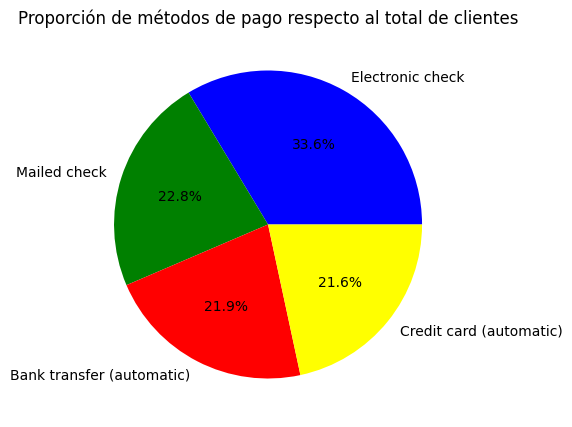

In [39]:
# Visualización 1

TipoPago = df['PaymentMethod'].value_counts() # datos desde el df

plt.figure(figsize=(5, 5)) # tamaño del gráfico
plt.pie(TipoPago,               # Eje x
        labels=TipoPago.index,  # Etiquetas para el gráfico
        autopct='%1.1f%%',      # Cálculo autompatico de las proporciones entregadas del df
        colors=['blue', 'green', 'red', 'yellow']) # Colores para direfenciar el tipo de dato

plt.title('Proporción de métodos de pago respecto al total de clientes') #título del gráfico
plt.show() # mostrar gráfico


Del gráfico se infiere que el método de pago más común corresponde a Electronic check, representando un 33.6% del total de la muestra analizada. 

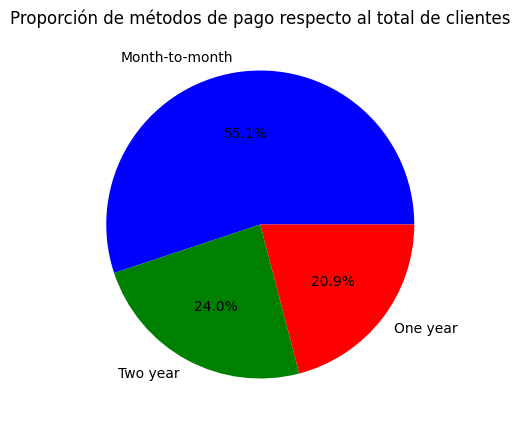

In [40]:
Tipocontrato = df['Contract'].value_counts() # datos desde el df

plt.figure(figsize=(5, 5)) # tamaño del gráfico
plt.pie(Tipocontrato,               # Eje x
        labels=Tipocontrato.index,  # Etiquetas para el gráfico
        autopct='%1.1f%%',      # Cálculo autompatico de las proporciones entregadas del df
        colors=['blue', 'green', 'red']) # Colores para direfenciar el tipo de dato

plt.title('Proporción de métodos de pago respecto al total de clientes') #título del gráfico
plt.show() # mostrar gráfico

La mayoría de los clientes, tienen un contrato de tipo de pago mensual, lo que implica que se debe tener especial cuidadeo en la fuga de clientes de este tipo ya que se pueden escapar a la competencia con mayor facilidad. Esto debido a que no se tiene un compromiso a largo plazo del tipo monetario para retener al cliente.

### Visualizaciones exploratorias multivariables

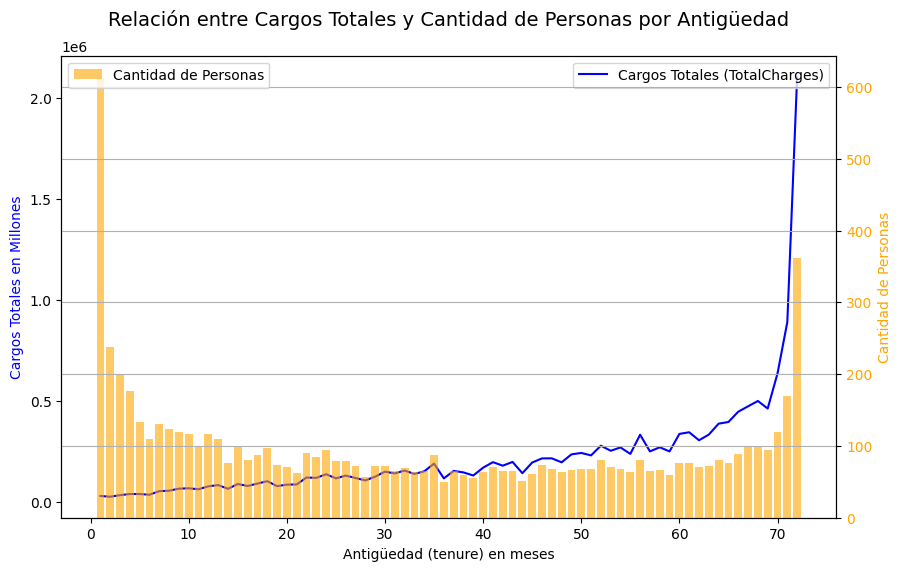

In [41]:
mensual = df.groupby('tenure')['TotalCharges'].sum()
antiguedad = df['tenure'].sort_values(ascending=True).unique()
cantidadDePersonas = df.groupby('tenure')['customerID'].count() #incorporación de datos desde el df

#print(mensual) # comprobación de datos
#print(antiguedad)
#print(cantidadDePersonas)


fig, ax1 = plt.subplots(figsize=(10, 6)) #creación de primera figura

# Primer eje (línea)
ax1.plot(antiguedad, mensual, color='blue', label='Cargos Totales (TotalCharges)') # datos y etiquetas
ax1.set_xlabel('Antigüedad (tenure) en meses', fontsize=10) 
ax1.set_ylabel('Cargos Totales en Millones', color='blue', fontsize=10)

ax1.legend(loc='upper right') #legenda para comprender el tipo de dato


# Segundo eje (barras)
ax2 = ax1.twinx() # se crea eje segundario utilizando un eje común (el x)
ax2.bar(antiguedad, cantidadDePersonas, color='orange', alpha=0.6, label='Cantidad de Personas') #datos y etiquetas para el otro eje
ax2.set_ylabel('Cantidad de Personas', color='orange', fontsize=10)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper left')

# Título y cuadrícula
plt.title('Relación entre Cargos Totales y Cantidad de Personas por Antigüedad\n', fontsize=14)
plt.grid()
# Mostrar gráfico
plt.show()

Con el gráfico anterior, se puede evidenciar que la empresa posee una buena capacidad de retención de clientes debido a que los cargos totales aumentan en función de la antiguedad de los clientes. Por otro lado, parece existir una incapacidad de mantener clientes nuevos debido a que el nivel de clientes nuevos es alto pero no se moviliza en comparación al resto de los datos. dando oportunidades de implementar estrategias para mejorar el CRM.

<Figure size 1200x600 with 0 Axes>

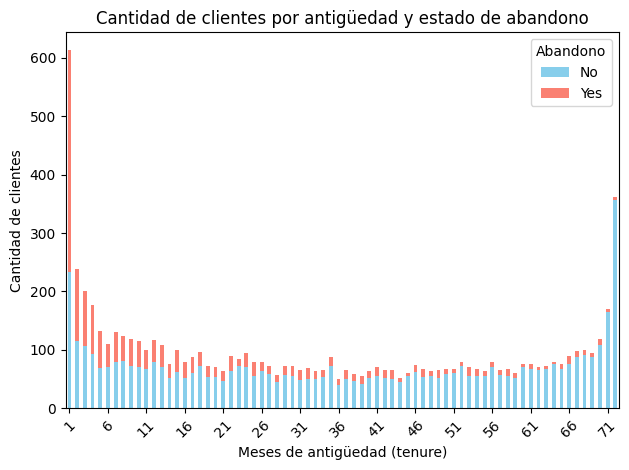

In [ ]:
# Contar cantidad de clientes por tenure y churn
conteo = df.groupby(['tenure', 'Churn']).size().unstack(fill_value=0) # se filtran los datos desde el df

plt.figure(figsize=(12,6))
ax = conteo.plot(kind='bar', stacked=True, color=['skyblue', 'salmon']) # detalels para el  gráfico

plt.title('Cantidad de clientes por antigüedad y estado de abandono')# Títulos de eje, de gráficp y leyenda
plt.xlabel('Meses de antigüedad (tenure)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Abandono')

# Mostrar etiquetas del eje x cada 5 meses
pasos = range(0, len(conteo), 5)  # índices 0,5,10,...
etiqueta = [str(x) for x in conteo.index[pasos]]

plt.xticks(pasos, etiqueta, rotation=45)
plt.tight_layout()
plt.show()

Continuando con el análisis anterior, en este gráfico, se ve representado la deserción de clintes respecto a su antiguedad, por lo que debe haber una variable para analizar en que es critica para que los clientes conserven el servicio.